# QUESTION 5

In [31]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Load data

In [32]:
df_2020CASES = pd.read_csv('2020 Cases Only.csv', low_memory=False)
df_2021CASES = pd.read_csv('2021 Cases Only.csv', low_memory = False)

## Combine both year cases

In [33]:
# Combine the two separate covid data for 2020 and 2021
df_combined = df_2020CASES.append(df_2021CASES)

C:\Users\Aiswarya Reddy\AppData\Local\Temp\ipykernel_3032\1001993919.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_2020CASES.append(df_2021CASES)


# QUESTION 6

In [34]:
c_combined = df_combined.groupby(['EventDate']).count() 

In [35]:
type(c_combined.index[0])

str

In [36]:
c_combined.index = pd.to_datetime(c_combined.index, format="%m/%d/%Y")

In [37]:
c_combined['County']

EventDate
2020-01-01       21
2021-01-01    13720
2020-01-10        2
2021-01-10    11694
2021-01-11    14249
              ...  
2020-09-05     2545
2020-09-06     2217
2020-09-07     2478
2020-09-08     2699
2020-09-09     2491
Name: County, Length: 508, dtype: int64

In [38]:
c_sorted = c_combined.sort_index(axis='index', ascending=True)

In [39]:
c_sorted.columns

Index(['OBJECTID', 'County', 'Age', 'Age_group', 'Gender', 'Jurisdicti',
       'Travel_rel', 'Origin', 'EDvisit', 'Hospitaliz', 'Died', 'Case_',
       'Contact', 'Case1', 'ChartDate', 'ObjectId2', 'ObjectId'],
      dtype='object')

## Sorting with respect to Osceola County and St Lucie County

In [40]:
df_os = df_combined[df_combined['County'].isin(['Osceola', 'St. Lucie'])]

In [41]:
osceola_county = df_os[df_os['County'] == 'Osceola']
st_Lucie_county = df_os[df_os['County'] == 'St. Lucie']

## Osceola County

In [42]:
df_os_count_osceola_county = osceola_county.groupby(['EventDate']).count() 

#format date and sort 

df_os_count_osceola_county.index = pd.to_datetime(df_os_count_osceola_county.index, format="%m/%d/%Y")

df_os_count_sorted_osceola_county = df_os_count_osceola_county.sort_index(axis='index', ascending=True)

df_os_count_sorted_osceola_county['Date'] = df_os_count_sorted_osceola_county.index.values

df_os_count_sorted_osceola_county['Daily Cases'] = df_os_count_sorted_osceola_county['County']


## St Lucie County

In [43]:
df_os_count_st_Lucie_county = st_Lucie_county.groupby(['EventDate']).count() 

#format date and sort 

df_os_count_st_Lucie_county.index = pd.to_datetime(df_os_count_st_Lucie_county.index, format="%m/%d/%Y")

df_os_count_sorted_st_Lucie_county = df_os_count_st_Lucie_county.sort_index(axis='index', ascending=True)

df_os_count_sorted_st_Lucie_county['Date'] = df_os_count_sorted_st_Lucie_county.index.values

df_os_count_sorted_st_Lucie_county['Daily Cases'] = df_os_count_sorted_st_Lucie_county['County']

In [44]:
df_os_count = df_os.groupby(['EventDate']).count() 

#format date and sort 

df_os_count.index = pd.to_datetime(df_os_count.index, format="%m/%d/%Y")

df_os_count_sorted = df_os_count.sort_index(axis='index', ascending=True)

df_os_count_sorted['Date'] = df_os_count_sorted.index.values

df_os_count_sorted['Daily Cases'] = df_os_count_sorted['County']


In [45]:
county_data = df_os_count_sorted

In [46]:
osceola_county = df_os_count_sorted_osceola_county
st_Lucie_county = df_os_count_sorted_st_Lucie_county

In [47]:
osceola_county['Moving Average'] = osceola_county['Daily Cases'].rolling(5).mean()
st_Lucie_county['Moving Average'] = st_Lucie_county['Daily Cases'].rolling(5).mean()

## 2 by 2 visualization for Osceola and St. Lucie County 
## The first row showing daily cases and the moving average for Osceola County, and the second row showing information for St Lucie County

[]

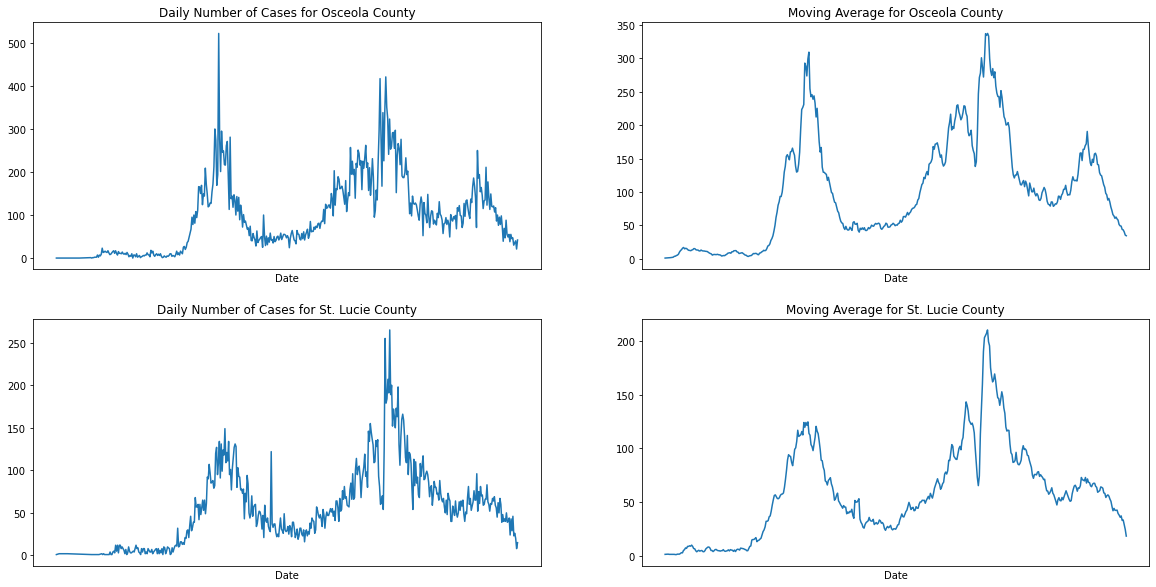

In [48]:
fig, h_axes = plt.subplots(2,2,figsize=[20,10])

# Daily Cases for Osceola County plot

plt.sca(h_axes[0,0])

plt.plot(osceola_county['Date'], osceola_county['Daily Cases'])

h_axes[0,0].set_title('Daily Number of Cases for Osceola County')
h_axes[0,0].set_xlabel('Date')
h_axes[0,0].set_xticks([])

# Moving average for Osceola County plot

plt.sca(h_axes[0,1])

plt.plot(osceola_county['Date'], osceola_county['Moving Average'])

h_axes[0,1].set_title('Moving Average for Osceola County')
h_axes[0,1].set_xlabel('Date')
h_axes[0,1].set_xticks([])


# Daily cases for ST Lucie County plot

plt.sca(h_axes[1,0])

plt.plot(st_Lucie_county['Date'], st_Lucie_county['Daily Cases'])

h_axes[1,0].set_title('Daily Number of Cases for St. Lucie County')
h_axes[1,0].set_xlabel('Date')
h_axes[1,0].set_xticks([])

# Moving average for ST Lucie County plot

plt.sca(h_axes[1,1])

plt.plot(st_Lucie_county['Date'], st_Lucie_county['Moving Average'])

h_axes[1,1].set_title('Moving Average for St. Lucie County')
h_axes[1,1].set_xlabel('Date')
h_axes[1,1].set_xticks([])
